<a href="https://colab.research.google.com/github/DhirajBembade/Capstone-Projects/blob/main/Startup%20funding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np 
import warnings
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline 

from wordcloud import WordCloud
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error
from numpy import mean,std, absolute
from sklearn.model_selection import cross_val_score, RepeatedKFold

sns.set_style('darkgrid')
pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')

In [ ]:
#reading dataset
df = pd.read_csv('/content/drive/MyDrive/startup_funding.csv')

In [ ]:
df

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",NaN
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",NaN
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",NaN
...,...,...,...,...,...,...,...,...,...,...
3039,3040,29/01/2015,Printvenue,NaN,NaN,NaN,Asia Pacific Internet Group,Private Equity,"45,00,000",NaN
3040,3041,29/01/2015,Graphene,NaN,NaN,NaN,KARSEMVEN Fund,Private Equity,"8,25,000",Govt backed VC Fund
3041,3042,30/01/2015,Mad Street Den,NaN,NaN,NaN,"Exfinity Fund, GrowX Ventures.",Private Equity,"15,00,000",NaN
3042,3043,30/01/2015,Simplotel,NaN,NaN,NaN,MakeMyTrip,Private Equity,NaN,"Strategic Funding, Minority stake"


In [ ]:
df.shape

(3044, 10)

In [ ]:
df.columns

Index(['Sr No', 'Date dd/mm/yyyy', 'Startup Name', 'Industry Vertical',
       'SubVertical', 'City  Location', 'Investors Name', 'InvestmentnType',
       'Amount in USD', 'Remarks'],
      dtype='object')

In [ ]:
#checking null values in dataset
df.isnull().sum()

Sr No                   0
Date dd/mm/yyyy         0
Startup Name            0
Industry Vertical     171
SubVertical           936
City  Location        180
Investors Name         24
InvestmentnType         4
Amount in USD         960
Remarks              2625
dtype: int64

In [ ]:
#checking info of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3044 entries, 0 to 3043
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Sr No              3044 non-null   int64 
 1   Date dd/mm/yyyy    3044 non-null   object
 2   Startup Name       3044 non-null   object
 3   Industry Vertical  2873 non-null   object
 4   SubVertical        2108 non-null   object
 5   City  Location     2864 non-null   object
 6   Investors Name     3020 non-null   object
 7   InvestmentnType    3040 non-null   object
 8   Amount in USD      2084 non-null   object
 9   Remarks            419 non-null    object
dtypes: int64(1), object(9)
memory usage: 237.9+ KB


In [ ]:
#removing date column from data
df = df.drop(['Date dd/mm/yyyy'], axis=1)

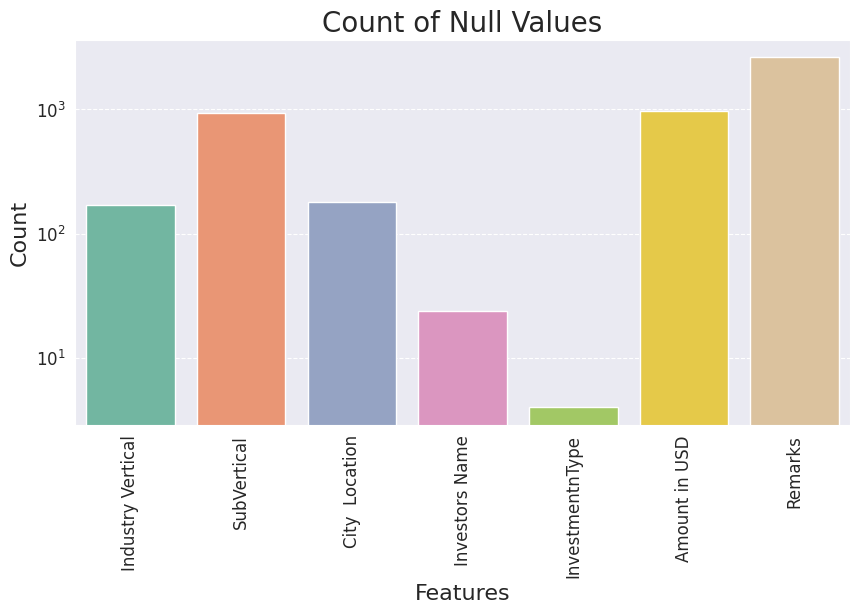

In [ ]:
#import matplotlib.pyplot as plt
#import seaborn as sns

null_label = df.isnull().sum()[2:]
plt.figure(figsize=(10, 5))

# Define a custom color palette
colors = sns.color_palette('Set2', len(null_label.index))

# Create the bar plot with customized colors
sns.barplot(x=null_label.index, y=null_label, log=True, palette=colors)

plt.title("Count of Null Values", fontsize=20)
plt.xlabel('Features', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--')

plt.show()


In [ ]:
#Filling 'Investors Name
df['Investors Name'] = df['Investors Name'].fillna("Unknown")

#Filling Industry Vertical Value
df['Industry Vertical'] = df['Industry Vertical'].fillna(method='ffill')

#Filling SubVertical Value with mode of Subvertical column
df['SubVertical'] = df['SubVertical'].fillna(df['SubVertical'].mode()[0])

#Filling City Location Value
df['City  Location'] = df['City  Location'].fillna(df['City  Location'].value_counts().index[0])


In [ ]:
df.head(10)

,Sr No,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
0,1,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN
1,2,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN
2,3,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",NaN
3,4,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",NaN
4,5,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",NaN
5,6,Pando,Logistics,"Open-market, freight management platform",Chennai,Chiratae Ventures,Series A,"90,00,000",NaN
6,7,Zomato,Hospitality,Online Food Delivery Platform,Gurgaon,Ant Financial,Private Equity Round,"15,00,00,000",NaN
7,8,Ecozen,Technology,Agritech,Pune,Sathguru Catalyzer Advisors,Series A,"60,00,000",NaN
8,9,CarDekho,E-Commerce,Automobile,Gurgaon,Ping An Global Voyager Fund,Series D,"7,00,00,000",NaN
9,10,Dhruva Space,Aerospace,Satellite Communication,Bengaluru,"Mumbai Angels, Ravikanth Reddy",Seed,"5,00,00,000",NaN


In [ ]:
#Removing those rows whose column value are: undisclosed, Undisclosed, unknown
df.drop(df.loc[(df['Amount in USD'] == 'undisclosed') | (df['Amount in USD'] == 'Undisclosed') | 
                (df['Amount in USD'].isnull()) | (df['Amount in USD'] == 'unknown')].index,inplace=True)

In [ ]:
#Renaming rows
df["Amount in USD"] = df["Amount in USD"].apply(lambda x:(str(x).replace('undisclosed','').replace(",","").replace('Undisclosed','')
                                                              .replace("+","").replace(r'N/A', "others").replace(r'n/a',"others")))

In [ ]:
df['Amount in USD'] = df['Amount in USD'].str.replace(r"\\+",'')
df['Amount in USD'] = df['Amount in USD'].str.replace("xc2xa0",'')

In [ ]:
#Filling remarks
df['Remarks'].fillna('None', inplace=True)

In [ ]:
#Taking only those rows whose column value other than others
df = df[df['Amount in USD']!='others']

#Converting Amount in USD into numeric
df['Amount in USD'] = pd.to_numeric(df['Amount in USD']) 

In [ ]:
#Replacing  \\ from City Location
df['City  Location'] = df['City  Location'].str.replace(r'\\+', '')
df['City  Location'] = df['City  Location'].str.replace("xc2xa0", "")

In [ ]:
df['City  Location'].dtype

dtype('O')

In [ ]:
#Taking First City
def remove_ex(x):
    return str(x).split('/')[0].strip()
df['City  Location']=df['City  Location'].map(remove_ex)

#InvestmentnType
def remove_ex_inves(x):
    return str(x).split('/')[0].strip()
df['InvestmentnType'] = df['InvestmentnType'].map(remove_ex_inves)

In [ ]:
#Creating new list
startup_10 = []

for s in df['Startup Name'].unique():
    ''' get the dataframe for each startup '''
    df_ = df[df['Startup Name'] == s]    
    
    ''' sum total funding of startup''' 
    sm = np.sum(df_['Amount in USD'])         
    
    startup_10.append([s, sm])

In [ ]:
df_startup= pd.DataFrame(startup_10, columns=['startup','Revenue" in million"'])

#Converting the list to dataframe and sort them by the fundin amount
df_startup.sort_values(by='Revenue" in million"',ascending=False,inplace=True)

df_startup

,startup,"Revenue"" in million"""
482,Flipkart,4.059700e+09
55,Rapido Bike Taxi,3.900000e+09
29,Paytm,3.148950e+09
533,Ola,9.845000e+08
31,Udaan,8.700000e+08
...,...,...
1691,Enabli,1.600000e+04
1690,Yo Grad,1.600000e+04
1689,Play your sport,1.600000e+04
1688,Hostel Dunia,1.600000e+04


In [ ]:
df_startup = df_startup.rename(columns={'Revenue" in million"': 'revenue'})

In [ ]:
#Diving amount by 1M to show data in term of Millions
df_startup['revenue'] /= 1000000
rev = df_startup.head(10)

In [ ]:
label = df_startup.startup.head(10)
label

482             Flipkart
55      Rapido Bike Taxi
29                 Paytm
533                  Ola
31                 Udaan
1489        Flipkart.com
1141            Snapdeal
59              Ola Cabs
168           True North
289            BigBasket
Name: startup, dtype: object

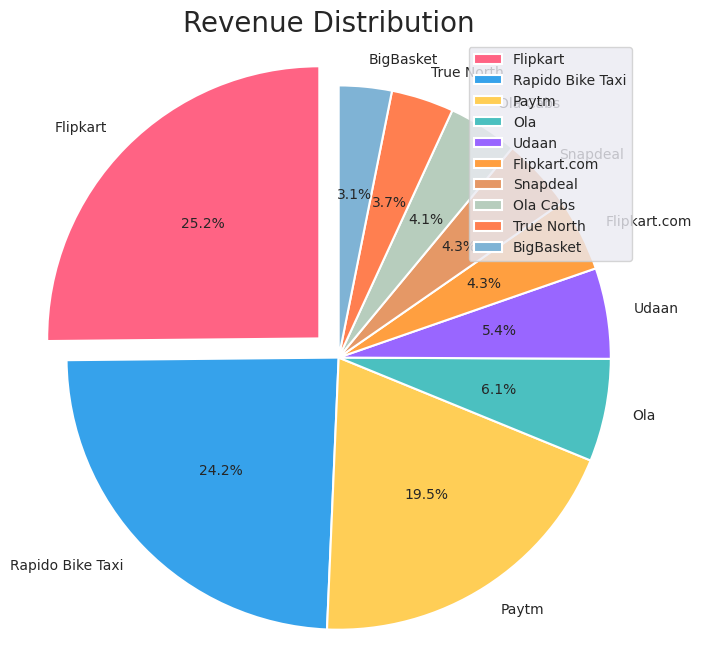

In [ ]:
#import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))

# Define a custom color palette
colors = ['#FF6384', '#36A2EB', '#FFCE56', '#4BC0C0', '#9966FF', '#FF9F40', '#E59866', '#B7CDBD', '#FF7F50', '#7FB3D5']

explode = (0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)  # Explode the first slice

plt.pie(rev.revenue, labels=label, explode=explode, autopct='%1.1f%%', colors=colors, startangle=90,
        wedgeprops={'edgecolor': 'white', 'linewidth': 1.5})

plt.title("Revenue Distribution", fontsize=20)
plt.axis('equal')  # Ensure the pie is drawn as a circle
plt.legend(loc='upper right')

plt.show()

In [ ]:
#Investor func to name undisclosed investors to others
def investor(y):
    ''' strip() removes unwanted spaces or anything at start and at the end'''
    y = y.strip()
    
    if y == 'undisclosed' or y == 'undisclosed investors' or y == 'undisclosed investor':
        return 'others'
    else:
        return y
df["Investors Name"]=df["Investors Name"].apply(investor)

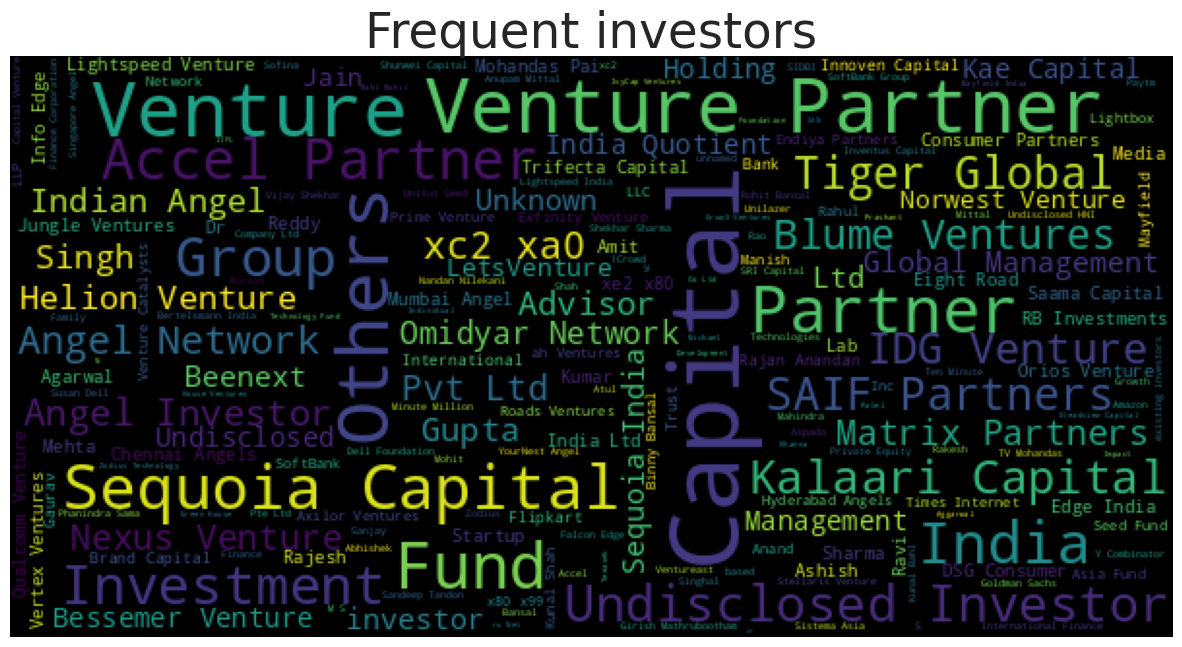

In [ ]:
n = df[df['Investors Name'] != 'others']["Investors Name"]

#Wordcount representation
word_cloud = WordCloud(max_font_size=50, width=600, height=300, background_color='black').generate(' '.join(n))
plt.figure(figsize=(15,8))
plt.imshow(word_cloud)
plt.title("Frequent investors", fontsize=35)
plt.axis("off")
plt.show()

**OR**

In [ ]:
#Aggregate the revenue as per the startup name
for i, r in df.iterrows():
    df.at[i,'Location'] = list(set(df[df['Startup Name'] == r['Startup Name']]['City  Location'].values))
    df.at[i,'Revenue'] = float(np.sum(df[df['Startup Name'] == r['Startup Name']]['Amount in USD'].values))

In [ ]:
#Remove the duplicate startups rows'''
df.drop_duplicates(subset='Startup Name',keep=False,ignore_index=True,inplace=True)

In [ ]:
#Convert location to the one-hot  encoding'''
mul_lbl_bin = MultiLabelBinarizer()
result = pd.DataFrame(mul_lbl_bin.fit_transform(df['Location']), columns=mul_lbl_bin.classes_, index=df['Location'].index)

In [ ]:
#Concating Data
df=pd.concat([df,result],axis=1)

In [ ]:
df.head()

,Sr No,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks,Location,Revenue,Ahemadabad,Ahmedabad,Amritsar,B,Bangalore,Belgaum,Bengaluru,Bengaluru and Gurugram,Bhopal,Bhubneswar,Boston,Burnsville,California,Chandigarh,Chembur,Chennai,Coimbatore,Dallas,Delhi,Delhi & Cambridge,Faridabad,Gaya,Goa,Gurgaon,Gurugram,Gwalior,Haryana,Hyderabad,India,Indore,Jaipur,Jodhpur,Kanpur,Karnataka,Kerala,Kolkata,Kormangala,Lucknow,Menlo Park,Missourie,Mumbai,Nagpur,Nairobi,New Delhi,New York,Noida,Panaji,Pune,Rourkela,SFO,San Francisco,"San Jose,",Santa Monica,Singapore,Surat,Trivandrum,Tulangan,US,USA,Udaipur,Udupi,Vadodara,Varanasi,a,e,g,l,n,r,u
0,1,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,200000000.0,None,Bengaluru,200000000.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1
1,3,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,18358860.0,None,[Bengaluru],18358860.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,4,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,3000000.0,None,[New Delhi],3000000.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,5,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,1800000.0,None,[Mumbai],1800000.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,6,Pando,Logistics,"Open-market, freight management platform",Chennai,Chiratae Ventures,Series A,9000000.0,None,[Chennai],9000000.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
#Tfidf '''
tfidf = TfidfVectorizer(stop_words='english',analyzer='word',max_features=500)
res = tfidf.fit_transform(df['SubVertical'])


1. `TfidfVectorizer` is a class from the `sklearn.feature_extraction.text` module in scikit-learn. It is used to convert a collection of raw documents into a matrix of TF-IDF features.

2. In the code, we create an instance of `TfidfVectorizer` and assign it to the variable `tfidf`. We pass three parameters to the constructor:
   - `stop_words='english'` specifies that common English words should be ignored during the vectorization process. These words are often called "stop words" and they don't carry much meaning in the context of natural language processing tasks.
   - `analyzer='word'` indicates that the input will be treated as a sequence of words rather than characters or other units. This means that the vectorizer will tokenize the text into individual words.
   - `max_features=500` sets the maximum number of features (words) to be extracted from the text. The vectorizer will select the top 500 most important features based on their term frequency-inverse document frequency (TF-IDF) scores.

3. The `fit_transform()` method of `TfidfVectorizer` is then called on the `'SubVertical'` column of the DataFrame `df`. This method fits the vectorizer to the data and transforms the text into a TF-IDF matrix. The result is assigned to the variable `res`, which will contain the matrix representation of the `'SubVertical'` text data.

After running this code, you can use the `res` variable to access the TF-IDF matrix and perform further analysis or modeling tasks on your text data.

In [ ]:
df.reset_index(drop=True,inplace=True)

In [ ]:
df.head()

,Sr No,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks,Location,Revenue,Ahemadabad,Ahmedabad,Amritsar,B,Bangalore,Belgaum,Bengaluru,Bengaluru and Gurugram,Bhopal,Bhubneswar,Boston,Burnsville,California,Chandigarh,Chembur,Chennai,Coimbatore,Dallas,Delhi,Delhi & Cambridge,Faridabad,Gaya,Goa,Gurgaon,Gurugram,Gwalior,Haryana,Hyderabad,India,Indore,Jaipur,Jodhpur,Kanpur,Karnataka,Kerala,Kolkata,Kormangala,Lucknow,Menlo Park,Missourie,Mumbai,Nagpur,Nairobi,New Delhi,New York,Noida,Panaji,Pune,Rourkela,SFO,San Francisco,"San Jose,",Santa Monica,Singapore,Surat,Trivandrum,Tulangan,US,USA,Udaipur,Udupi,Vadodara,Varanasi,a,e,g,l,n,r,u
0,1,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,200000000.0,None,Bengaluru,200000000.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1
1,3,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,18358860.0,None,[Bengaluru],18358860.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,4,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,3000000.0,None,[New Delhi],3000000.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,5,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,1800000.0,None,[Mumbai],1800000.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,6,Pando,Logistics,"Open-market, freight management platform",Chennai,Chiratae Ventures,Series A,9000000.0,None,[Chennai],9000000.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
''' converting vector list to array '''
res = res.toarray()   
df_new = pd.DataFrame(res)

'''concating with original '''
df = pd.concat([df,df_new],axis=1)

In [ ]:
df

,Sr No,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks,Location,Revenue,Ahemadabad,Ahmedabad,Amritsar,B,Bangalore,Belgaum,Bengaluru,Bengaluru and Gurugram,Bhopal,Bhubneswar,Boston,Burnsville,California,Chandigarh,Chembur,Chennai,Coimbatore,Dallas,Delhi,Delhi & Cambridge,Faridabad,Gaya,Goa,Gurgaon,Gurugram,Gwalior,Haryana,Hyderabad,India,Indore,Jaipur,Jodhpur,Kanpur,Karnataka,Kerala,Kolkata,Kormangala,Lucknow,Menlo Park,Missourie,Mumbai,Nagpur,Nairobi,New Delhi,New York,Noida,Panaji,Pune,Rourkela,SFO,San Francisco,"San Jose,",Santa Monica,Singapore,Surat,Trivandrum,Tulangan,US,USA,Udaipur,Udupi,Vadodara,Varanasi,a,e,g,l,n,r,u,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499
0,1,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,200000000.0,None,Bengaluru,200000000.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [ ]:
#from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
lbl_enc = LabelEncoder()

# Encode categorical columns
df['Startup Name'] = lbl_enc.fit_transform(df['Startup Name'])
df['Industry Vertical'] = lbl_enc.fit_transform(df['Industry Vertical'])
df['InvestmentnType'] = lbl_enc.fit_transform(df['InvestmentnType'])

# Drop unnecessary columns
columns_to_drop = ['Industry Vertical', 'SubVertical', 'Investors Name', 'Remarks',
                   'Amount in USD', 'Location', 'City  Location']
df.drop(columns_to_drop, inplace=True, axis=1)

# Convert 'Revenue' values to millions
df['Revenue'] /= 1000000
